In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# 그래프에서 선의 종류
# グラフの線の種類
linestyles = ['-', '--', ':']

def E( X, g= lambda x: x):
    x_set, f = X
    return np.sum ([g(x_k) * f(x_k) for x_k in x_set ])

def V( X, g=lambda x: x):
    x_set, f = X
    mean = E( X, g)
    return np.sum ([ (g(x_k) -mean) **2 * f(x_k) for x_k in x_set])

def check_prob (X):
    x_set, f=X
    prob = np.array ([ f(x_k) for x_k in x_set])
    assert np.all (prob >=0), '마이너스 확률'
    prob_sum = np.round (np.sum (prob),6)
    assert prob_sum == 1, f'확률의 합{prob_sum}'
    print ( f'expected value {E(X):.4}')
    print ( f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


In [3]:
# 포아송 분포(Poisson distribution)
# 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포
# 확률변수가 취할 수 있는 값은 0 , 1, 2... 전체이지만 구현의 편의상 19이하 정수로만..

from scipy.special import factorial

def Poi( lam ):
    x_set =np.arange( 20 )
    def f(x):
        if x in x_set:
            return  np.power (lam, x) / factorial (x) * np.exp (-lam)
        else:
            return 0
    return x_set, f

In [4]:
 ## Poi (3) 을 따르는 확률변수 X 작성

lam =3
X = Poi( lam )

expected value 3.0
variance 3.0


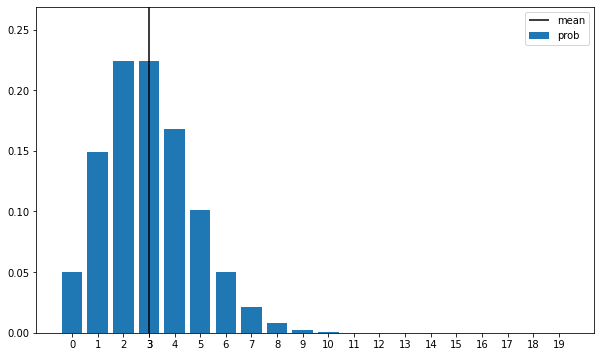

In [5]:
check_prob(X)
plot_prob(X)

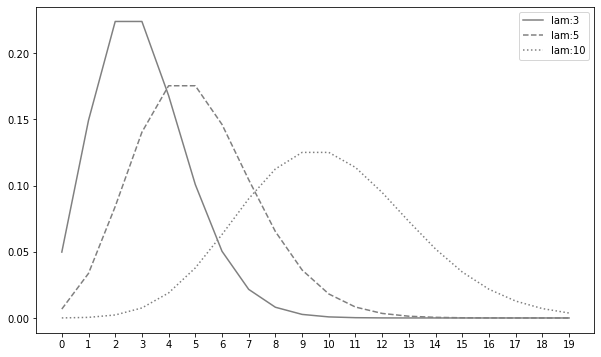

In [8]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    x_set = np.arange (20)
    for lam, ls in zip([ 3, 5, 10], linestyles):
        rv = stats.poisson( lam )
        ax.plot (x_set, rv.pmf (x_set),
                 label = f'lam:{lam}', ls=ls, color ='gray')
    ax.set_xticks( x_set )
    ax.legend()
    
    plt.show()